Usage notebook

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import optuna

from light_by_light.vacem_ini import W_to_E0
from light_by_light.vacem_simulation import run_gridscan
from light_by_light.optuna_optimization import run_optuna_optimization
from light_by_light.utils import write_yaml

### Gridscan simulation

In [9]:
# Laser pulse parameters
laser_params = []
for i in range(2):
    laser = {
        'tau': 25e-15,
        'lam': 800e-9,
        'w0': 2*800e-9,
        'W': 25,
        'theta': 180*i,
        'phi': 0,
        'beta': 0,
        'solution': 'gaussian_paraxial'
    }
    laser['E0'] = float(W_to_E0(laser))
    laser_params.append(laser)

laser_params = {f'laser_{i}': value for i,value in enumerate(laser_params)}

# Simulation box parameters
box_factors = {
    'long': 8,
    'trans': 20,
    't': 2
}

resolutions = {
    'spatial': 1,
    't': 1
}
simbox_params = {'box_factors': box_factors,
                 'resolutions': resolutions}

# Other parameters
mode = 'gridscan'
geometry = 'xz'
low_memory_mode = False
n_threads = 24
pol_idx = 0

obj_param = 'N_total'
n_trials = 10

data = {
    '_mode': mode,
    'lasers': laser_params,
    'simbox_params': simbox_params,
    'geometry': geometry,
    'low_memory_mode': low_memory_mode,
    'n_threads': n_threads,
    'pol_idx': pol_idx,
}

# Variable parameters 
laser_key = 'laser_0'
param_key = 'tau'
grid = [20,40,3,1e-15]
vary_params = {
    'lasers': {laser_key: {param_key: grid}}
}

# Save yaml files
save_path = 'runs/test/gridscan/experiment/'
Path(os.path.dirname(save_path)).mkdir(parents=True, exist_ok=True)

default_yaml = f'{save_path}default_params.yml'
write_yaml(default_yaml, data)

vary_yaml = f'{save_path}vary_params.yml'
write_yaml(vary_yaml, vary_params)

In [3]:
run_gridscan(default_yaml, vary_yaml, save_path)

Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 225/225 [00:13<00:00, 16.18it/s]


Performance statistics

Maximum memory usage:            482.4MiB
Total wall time:               14.45s
Performed iterations:          225
Initialization wall time:      0.47s
Wall time per iteration:       0.06s
Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_20/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 270/270 [00:23<00:00, 11.47it/s]


Performance statistics

Maximum memory usage:            728.2MiB
Total wall time:               24.24s
Performed iterations:          270
Initialization wall time:      0.60s
Wall time per iteration:       0.09s
Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_30/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 360/360 [00:48<00:00,  7.49it/s]


Performance statistics

Maximum memory usage:            1.1GiB
Total wall time:               49.24s
Performed iterations:          360
Initialization wall time:      0.98s
Wall time per iteration:       0.13s
Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_40/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Grid simulation finished!


In [7]:
keys = ['N_total', 'Nperp_total', 'N_disc', 'Nperp_disc']
results = {key: [] for key in keys}
tau_grid = np.linspace(grid[0], grid[1], grid[2], endpoint=True, dtype=int)
for tau in tau_grid:
    path_loc = f'{save_path}{laser_key}_{param_key}/{param_key}_{tau}/postprocess_data.npz' 
    result_loc = np.load(path_loc)
    for key in keys:
        results[key].append(result_loc[key])

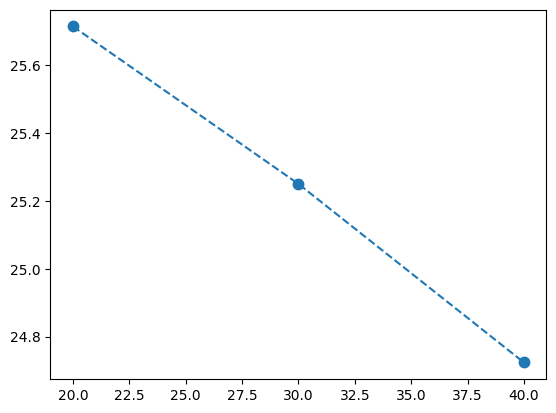

In [10]:
plt.figure()
plt.plot(tau_grid, results['N_total'], '.--', ms=15)
plt.show()

In [4]:
# One can also run gridscan simulation with one script
os.system(f'python cluster/gridscan_cluster.py --save_path={save_path}')

Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 225/225 [00:12<00:00, 17.67it/s]


Performance statistics

Maximum memory usage:            483.6MiB
Total wall time:               13.30s
Performed iterations:          225
Initialization wall time:      0.49s
Wall time per iteration:       0.06s


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_20/_vacem.npz
Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 270/270 [00:22<00:00, 11.79it/s]


Performance statistics

Maximum memory usage:            666.3MiB
Total wall time:               23.63s
Performed iterations:          270
Initialization wall time:      0.63s
Wall time per iteration:       0.09s


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_30/_vacem.npz
Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 360/360 [00:48<00:00,  7.45it/s]


Performance statistics

Maximum memory usage:            1.0GiB
Total wall time:               49.43s
Performed iterations:          360
Initialization wall time:      0.96s
Wall time per iteration:       0.13s
Successfully dumped to:        runs/test/gridscan/experiment/laser_0_tau/tau_40/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Grid simulation finished!


0

### Optuna optimization

In [6]:
# Laser pulse parameters
laser_params = []
for i in range(2):
    laser = {
        'tau': 25e-15,
        'lam': 800e-9,
        'w0': 2*800e-9,
        'W': 25,
        'theta': 180*i,
        'phi': 0,
        'beta': 0,
        'solution': 'gaussian_paraxial'
    }
    laser['E0'] = float(W_to_E0(laser))
    laser_params.append(laser)

laser_params = {f'laser_{i}': value for i,value in enumerate(laser_params)}

# Simulation box parameters
box_factors = {
    'long': 8,
    'trans': 20,
    't': 2
}

resolutions = {
    'spatial': 1,
    't': 1
}
simbox_params = {'box_factors': box_factors,
                 'resolutions': resolutions}

# Other parameters
mode = 'optuna'
geometry = 'xz'
low_memory_mode = False
n_threads = 24
pol_idx = 0

# Optuna params
obj_param = 'N_total'
n_trials = 10

data = {
    '_mode': mode,
    'lasers': laser_params,
    'simbox_params': simbox_params,
    'geometry': geometry,
    'low_memory_mode': low_memory_mode,
    'n_threads': n_threads,
    'pol_idx': pol_idx,
    'obj_param': obj_param,
    'n_trials': n_trials
}

# Variable parameters 
laser_key = 'laser_0'
param_key = 'tau'
grid = [25,40,1e-15,'uniform']
vary_params = {laser_key:
    {param_key: grid}
}


# Save yaml files
save_path = 'runs/test/optuna/experiment/'
Path(os.path.dirname(save_path)).mkdir(parents=True, exist_ok=True)

default_yaml = f'{save_path}default_params.yml'
write_yaml(default_yaml, data)

vary_yaml = f'{save_path}optuna_params.yml'
write_yaml(vary_yaml, vary_params)

In [7]:
run_optuna_optimization(default_yaml, vary_yaml, save_path)

[I 2023-09-29 11:24:09,354] Using an existing study with name 'experiment' instead of creating a new one.
/home/wi73yus/light-by-light/light_by_light/optuna_optimization.py:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  value = trial.suggest_uniform(param_name, param[0], param[1])


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 322/322 [00:31<00:00, 10.30it/s]


Performance statistics

Maximum memory usage:            876.2MiB
Total wall time:               37.35s
Performed iterations:          322
Initialization wall time:      5.96s
Wall time per iteration:       0.10s
Successfully dumped to:        runs/test/optuna/experiment/trials/trial_001/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
[I 2023-09-29 11:24:51,484] Trial 1 finished with value: 24.965471816195922 and parameters: {'laser_0/tau': 35.72873684285548}. Best is trial 1 with value: 24.965471816195922.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 300/300 [00:28<00:00, 10.43it/s]


Performance statistics

Maximum memory usage:            1.8GiB
Total wall time:               34.16s
Performed iterations:          300
Initialization wall time:      5.27s
Wall time per iteration:       0.10s


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Successfully dumped to:        runs/test/optuna/experiment/trials/trial_002/_vacem.npz


[I 2023-09-29 11:25:29,671] Trial 2 finished with value: 25.104812845133875 and parameters: {'laser_0/tau': 33.27748805338646}. Best is trial 2 with value: 25.104812845133875.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 359/359 [00:44<00:00,  8.03it/s]


Performance statistics

Maximum memory usage:            1.8GiB
Total wall time:               49.84s
Performed iterations:          359
Initialization wall time:      4.97s
Wall time per iteration:       0.12s


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Successfully dumped to:        runs/test/optuna/experiment/trials/trial_003/_vacem.npz


[I 2023-09-29 11:26:24,871] Trial 3 finished with value: 24.72796772714238 and parameters: {'laser_0/tau': 39.890023364262646}. Best is trial 2 with value: 25.104812845133875.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 334/334 [00:37<00:00,  8.95it/s]


Performance statistics

Maximum memory usage:            2.5GiB
Total wall time:               42.38s
Performed iterations:          334
Initialization wall time:      4.94s
Wall time per iteration:       0.11s
Successfully dumped to:        runs/test/optuna/experiment/trials/trial_004/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
[I 2023-09-29 11:27:11,934] Trial 4 finished with value: 24.888483800392944 and parameters: {'laser_0/tau': 37.11702190963077}. Best is trial 2 with value: 25.104812845133875.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 266/266 [00:22<00:00, 11.92it/s]


Performance statistics

Maximum memory usage:            2.5GiB
Total wall time:               26.64s
Performed iterations:          266
Initialization wall time:      4.22s
Wall time per iteration:       0.08s
Successfully dumped to:        runs/test/optuna/experiment/trials/trial_005/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
[I 2023-09-29 11:27:42,502] Trial 5 finished with value: 25.25874255877072 and parameters: {'laser_0/tau': 29.54218089227592}. Best is trial 5 with value: 25.25874255877072.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 321/321 [00:30<00:00, 10.37it/s]


Performance statistics

Maximum memory usage:            2.5GiB
Total wall time:               36.25s
Performed iterations:          321
Initialization wall time:      5.17s
Wall time per iteration:       0.10s


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Successfully dumped to:        runs/test/optuna/experiment/trials/trial_006/_vacem.npz


[I 2023-09-29 11:28:23,038] Trial 6 finished with value: 24.969388569045805 and parameters: {'laser_0/tau': 35.62540929819984}. Best is trial 5 with value: 25.25874255877072.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 242/242 [00:16<00:00, 14.75it/s]


Performance statistics

Maximum memory usage:            2.5GiB
Total wall time:               20.31s
Performed iterations:          242
Initialization wall time:      3.82s
Wall time per iteration:       0.07s
Successfully dumped to:        runs/test/optuna/experiment/trials/trial_007/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
[I 2023-09-29 11:28:46,745] Trial 7 finished with value: 25.42521709425677 and parameters: {'laser_0/tau': 26.805826647133628}. Best is trial 7 with value: 25.42521709425677.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 296/296 [00:24<00:00, 12.32it/s]


Performance statistics

Maximum memory usage:            2.5GiB
Total wall time:               28.18s
Performed iterations:          296
Initialization wall time:      4.04s
Wall time per iteration:       0.08s


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Successfully dumped to:        runs/test/optuna/experiment/trials/trial_008/_vacem.npz


[I 2023-09-29 11:29:19,054] Trial 8 finished with value: 25.11451760493394 and parameters: {'laser_0/tau': 32.88228903629398}. Best is trial 7 with value: 25.42521709425677.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 245/245 [00:18<00:00, 13.05it/s]


Performance statistics

Maximum memory usage:            2.5GiB
Total wall time:               22.18s
Performed iterations:          245
Initialization wall time:      3.32s
Wall time per iteration:       0.08s
Successfully dumped to:        runs/test/optuna/experiment/trials/trial_009/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
[I 2023-09-29 11:29:44,601] Trial 9 finished with value: 25.392071114775227 and parameters: {'laser_0/tau': 27.187097560501446}. Best is trial 7 with value: 25.42521709425677.


Parsing config...
Initializing SolverBase...
Initializing FieldSolver...
Initializing laser_1...


/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_1 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))
/home/wi73yus/packages/vacem-master/vacem/fields/parse_config.py:41: UserWarning: Warning: Unknown option key spectrum_method in section laser_2 will be ignored.
  warnings.warn("Warning: Unknown option key {key} in section {section} will be ignored.".format(key=k, section=section._name))


Initializing laser_2...
Initializing VacEm...
Starting main loop.
100%|██████████| 246/246 [00:18<00:00, 13.52it/s]


Performance statistics

Maximum memory usage:            2.5GiB
Total wall time:               21.61s
Performed iterations:          246
Initialization wall time:      3.32s
Wall time per iteration:       0.07s
Successfully dumped to:        runs/test/optuna/experiment/trials/trial_010/_vacem.npz


/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)
[I 2023-09-29 11:30:09,656] Trial 10 finished with value: 25.367572502604002 and parameters: {'laser_0/tau': 27.273306355218544}. Best is trial 7 with value: 25.42521709425677.


Optuna optimization finished!


In [12]:
study_name = save_path.split('/')[-2]
storage_name = f'sqlite:///{save_path}/study.db'

# Create optuna study
study = optuna.create_study(direction="maximize", study_name=study_name,
                            storage=storage_name, load_if_exists=True)

[I 2023-09-29 11:40:43,483] Using an existing study with name 'experiment' instead of creating a new one.


In [17]:
trials = [trial for trial in study.trials if trial.values is not None]
n = len(trials)
params = {param: np.empty(n) for param in trials[0].params}
user_attrs = {param: np.empty(n) for param in trials[0].user_attrs}

for i,trial in enumerate(trials):
    for key in params.keys():
        params[key][i] = trial.params[key]
    for key in user_attrs.keys():
        user_attrs[key][i] = trial.user_attrs[key]

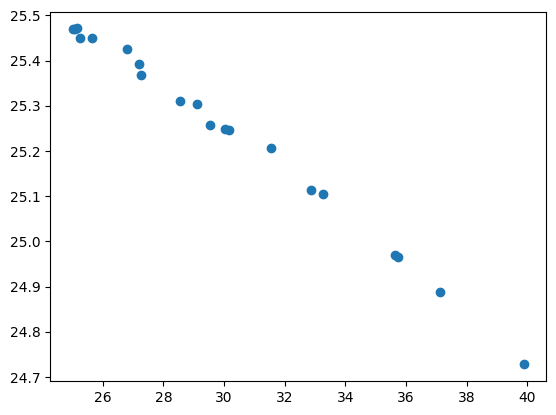

In [20]:
plt.figure()
plt.scatter(params['laser_0/tau'], user_attrs['N_total'])
plt.show()